# 4.1. 신경망이란 무엇인가
- 여러 자극 혹은 입력이 들어오면 각각 가중치를 곱해 더해주고 편차를 더해준 다음 이 값을 활성화함수를 통해 변형하여 전달
- 한 단위를 인공뉴런이라 하며, 이 뉴런들이 모인 네트워크를 인공신경망이라 함

# 4.2. 인공 신경망의 요소
- 여러 개의 입력값과 출력값을 가질 수 있으며, 은닉층의 수에 따라 ANN과 DNN으로 나눠서 부름
- ANN은 수식으로 표현하면 아래와 같음
    - y = w2(sigma(w1 * x + b1)) + b2
- 층이 세 개 있는 DNN은 다음과 같이 표현 가능
    - y = w4(sigma(w3(sigma(w2(sigma(w1 * x  + b1) + b2)) + b3)) + b4
- sigma는 활성화함수를 의미하며 비선형성을 갖는 시그모이드/하이퍼볼릭탄젠트/렐루같은 활성화함수를 이용함

- 대표적인 활성화함수
    - 시그모이드 : y(x) = 1 / (1 + e^-x)
    - 하이퍼볼릭 탄젠트 : y(x) = (e^x - e^-x)/(e^x + e^-x)
        - 위 두 함수는 모든 구간에서 미분이 가능하다는 장점이 있음
    - 렐루 : y(x) = max(0, x)
        - 0인 지점에서 미분이 안된다는 단점

# 4.3. 전파와 역전파(Forward propagation And backward propagation)
- 전파 : 입력값이 여러 은닉층을 통과하여 결과로 나오는 과정
- 역전파 : 결과와 정답의 차이로 계산된 손실을 미분의 연쇄법칙을 이용하여 입력단까지 다시 전달하는 과정

# 4.4. 모델 구현, 학습 및 결과확인

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [7]:
num_data = 1000
num_epochs = 10000
# 데이터 세팅
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [8]:
model = nn.Sequential(
    nn.Linear(1, 6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

loss_array = []

for i in range(num_epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward() # 오차 역전파
    optimizer.step()
    
    loss_array.append(loss)

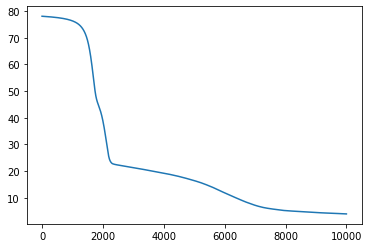

In [9]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()